## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 7. Востановление пропусков и прогноз значений временного ряда.**


#### **7.1 Аналитечкие методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с базовыми, аналитическими методами восстановления временных рядов.
Для выполнения данного пункта из каждой группы методов, представленных в ***табл. 7.1*** вам необходимо выбрать по одному методу восстановления ряда. При работе с первой группой, вам необходимо самостоятельно реализовать выбранный метод.  

**Табл. 7.1** - Группы аналитических методов восстановления.
№|Название группы|Модели и методы|
--|----|----|
1|Заполнение существующими значениями ряда|Средним, медианной, Hot-Deck|
2|Заполнение на основе близки значений|[Интерполяция](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html),  [KNNi](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)|
3|На основе матричных разложений|[CD-Rec](#Fixme:Дат ссылку), [SVD](https://pypi.org/project/fancyimpute/)|

##### 7.1.1 Загрузка и подготовка данных

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

practice_dir_path = '/content/drive/MyDrive/2024-Golenishchev-TimeSeriesCourse-main/practice/07 Imputation and Forecast'
dataset_dir_path = Path('/content/drive/MyDrive/2024-Golenishchev-TimeSeriesCourse-main/practice/07 Imputation and Forecast/datasets')
path_data = dataset_dir_path/'madrid.txt'
madrid = np.loadtxt(path_data)[:,0]
print(madrid.shape)

Mounted at /content/drive
(25000,)


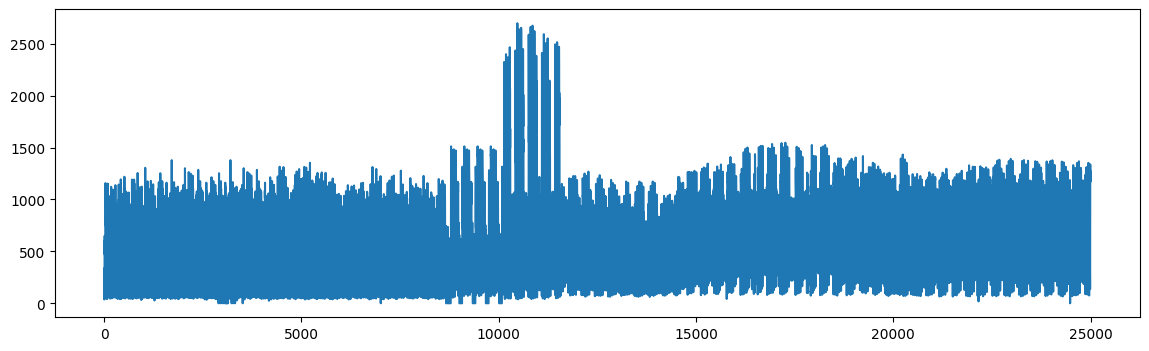

In [3]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(madrid[:])
plt.show()

Самостоятельно реализуйте функцию, принимающую на вход многомерный временной ряд и возвращающий:
1. Все подпоследовательности временного ряда, в которых некоторые значения временного ряда были заменены nan значениями.
2. Индексы пропущенных значений
   
Процент пропущенных значений должен регулироваться отдельным параметром.


In [4]:
import numpy as np
import torch

def add_nan(x, percent=0.25):
    """
    Функция для добавления пропущенных значений (nan) в заданный временной ряд.

    :param x: Входной многомерный временной ряд (numpy array).
    :param percent: Процент пропущенных значений (от 0 до 1).
    :return: Временной ряд с пропущенными значениями и индексы пропусков.
    """
    # Вычисляем количество пропущенных значений
    num_elements = x.size
    num_missing = int(num_elements * percent)

    # Случайным образом выбираем индексы для пропущенных значений
    missing_indices = np.random.choice(num_elements, num_missing, replace=False)

    # Создаем копию временного ряда, чтобы не изменить оригинал
    x_with_nan = x.copy()

    # Заменяем выбранные индексы на nan
    x_with_nan[missing_indices] = np.nan

    # Получаем подпоследовательности, где есть nan
    nan_sequences = []
    nan_indices = []

    for i in range(len(x_with_nan)):
        if np.isnan(x_with_nan[i]):
            start = max(0, i-5)  # Начало подпоследовательности (для примера, длина 5)
            end = min(len(x_with_nan), i+6)  # Конец подпоследовательности
            nan_sequences.append(x_with_nan[start:end])
            nan_indices.append(i)

    # Возвращаем только нужные значения
    return x_with_nan, missing_indices


madrid = np.loadtxt(path_data)[:, 0]  # Чтение данных


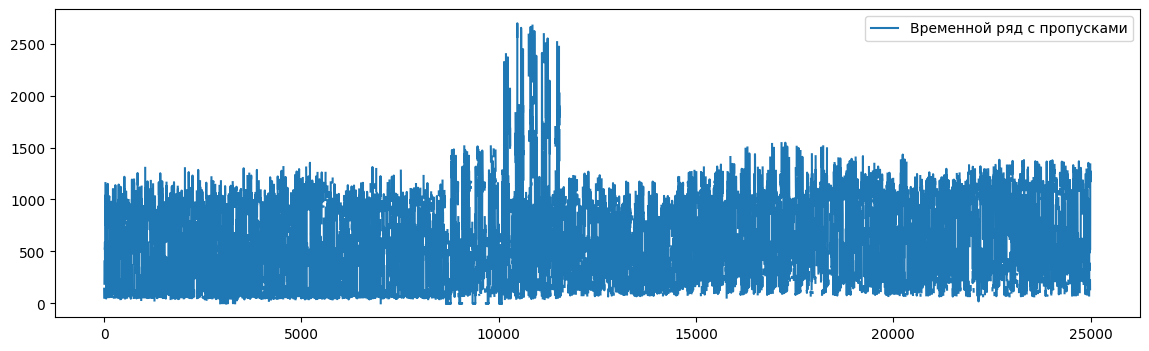

Индексы пропущенных значений: [22638 23433 11163 ...  6279 22143 19101]


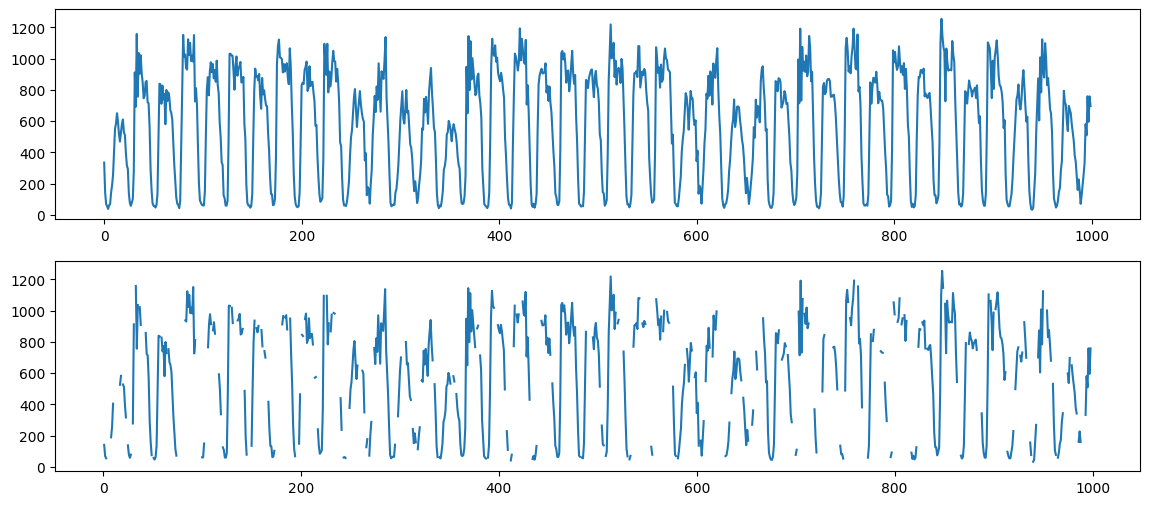

In [5]:
# Добавление пропусков
madrid_with_nan, missing_indices = add_nan(madrid, percent=0.25)

# Визуализация
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(madrid_with_nan, label='Временной ряд с пропусками')
ax.legend()
plt.show()

# Вывод индексов пропусков
print("Индексы пропущенных значений:", missing_indices)

# Визуализация с оригинальными и измененными данными
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_with_nan[:1000])
plt.show()

In [6]:
recovery = {}

##### 7.1.2 Заполнение существующими значениями ряда


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Определение индексов с NaN
index = np.where(np.isnan(madrid_with_nan))[0]

# Копирование массива и заполнение средним
madrid_mean = madrid_with_nan.copy()
madrid_mean[index] = np.nanmean(madrid_with_nan)

# Сохранение результата в словарь
recovery['mean'] = madrid_mean


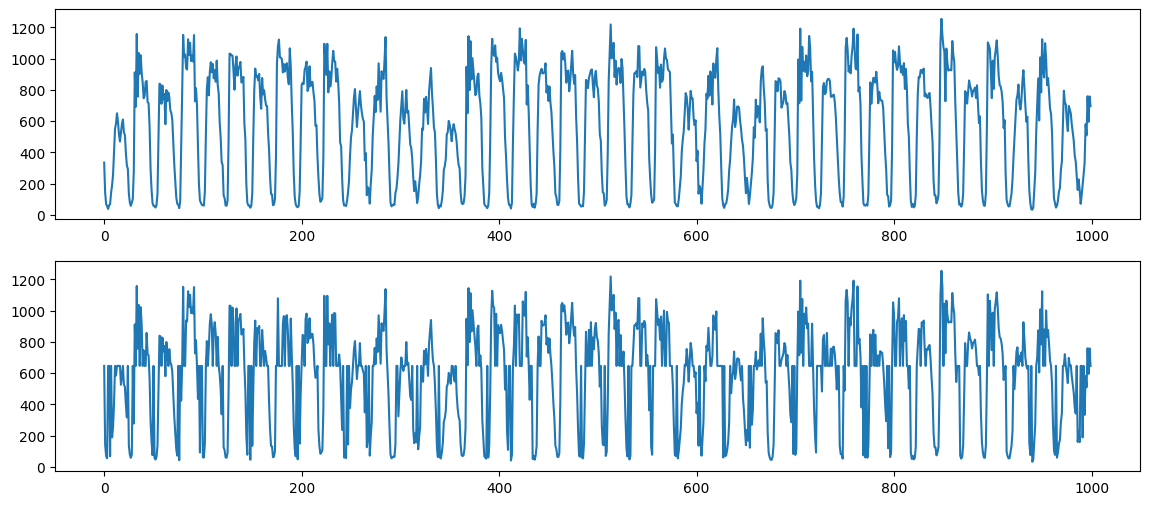

In [8]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_mean[:1000])
plt.show()

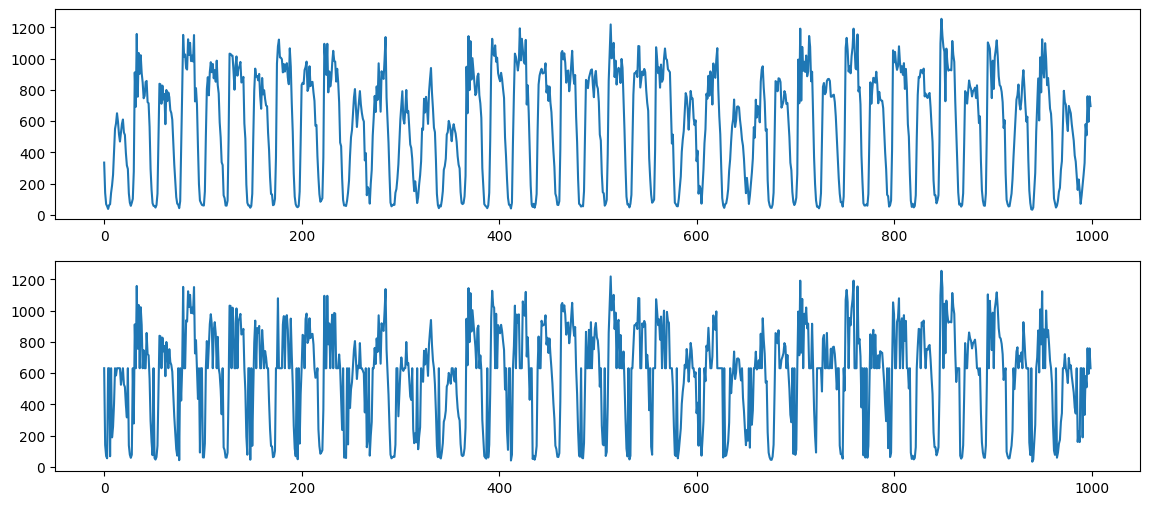

In [9]:
# Подготовка данных с пропущенными значениями
madrid_median = madrid_with_nan.copy()

# Заполнение пропущенных значений медианой
madrid_median[missing_indices] = np.nanmedian(madrid_median)

# Сохранение результата в словарь
recovery['median'] = madrid_median

# Визуализация
fig, ax = plt.subplots(figsize=(14,6), ncols=1, nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_median[:1000])
plt.show()


Самостоятельно реализуйте один метод из первой группы ***табл. 7.1*** и проведите постановление данных, сохранив результаты восстановления.

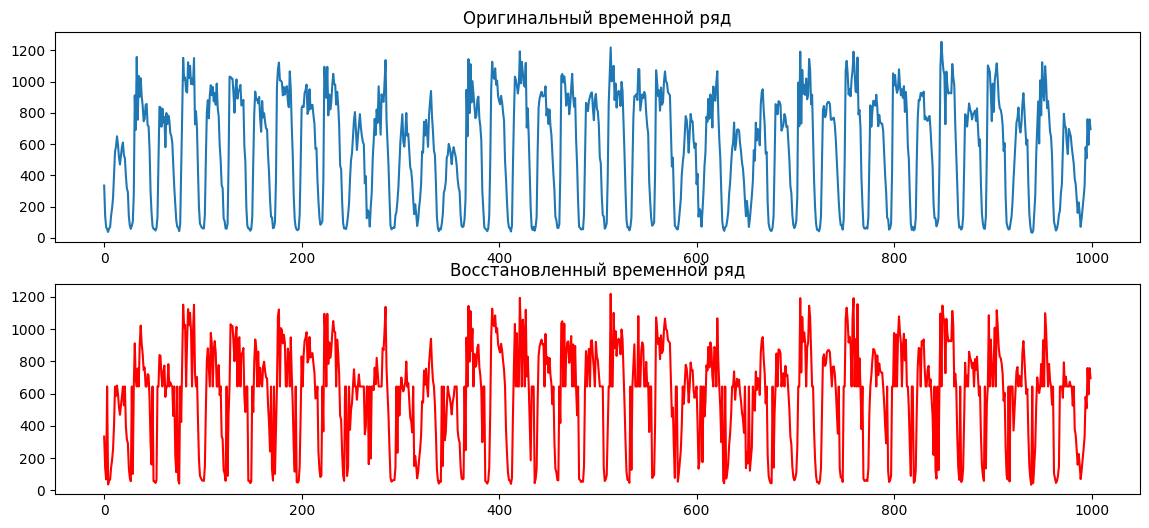

Индексы пропущенных значений: [ 4360 10742 16326 ... 16814  5462 14818]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для добавления пропусков в данные
def add_nan(x, percent=0.25):
    """
    Функция для добавления пропущенных значений (nan) в заданный временной ряд.

    :param x: Входной многомерный временной ряд (numpy array).
    :param percent: Процент пропущенных значений (от 0 до 1).
    :return: Временной ряд с пропущенными значениями и индексы пропусков.
    """
    num_elements = x.size
    num_missing = int(num_elements * percent)

    missing_indices = np.random.choice(num_elements, num_missing, replace=False)

    x_with_nan = x.copy()
    x_with_nan[missing_indices] = np.nan

    return x_with_nan, missing_indices

# Загрузка данных
madrid = np.loadtxt(path_data)[:, 0]  # Чтение данных

# Добавление пропусков в данные
madrid_with_nan, missing_indices = add_nan(madrid, percent=0.25)

# Заполнение пропусков средним значением
madrid_mean = madrid_with_nan.copy()
madrid_mean[missing_indices] = np.nanmean(madrid_mean)

# Сохранение результата восстановления
recovery = {}
recovery['mean'] = madrid_mean

# Визуализация оригинального и восстановленного временного ряда
fig, ax = plt.subplots(figsize=(14, 6), ncols=1, nrows=2)
ax[0].plot(madrid[:1000], label='Оригинальные данные')
ax[0].set_title('Оригинальный временной ряд')
ax[1].plot(madrid_mean[:1000], label='Данные после восстановления (среднее)', color='r')
ax[1].set_title('Восстановленный временной ряд')
plt.show()

# Выводим индексы пропусков
print("Индексы пропущенных значений:", missing_indices)


##### 7.1.3 Заполнение на основе близких значений


Используя документацию одного из методов восстановления второй группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

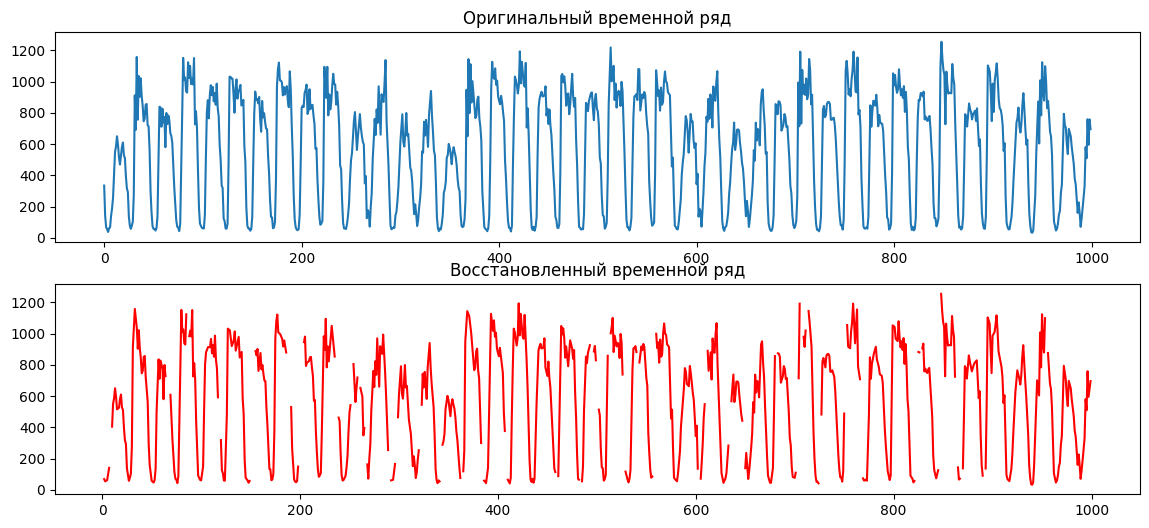

Индексы пропущенных значений: [16406 21524 24776 ...  7749 16917 22197]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для добавления пропусков в данные
def add_nan(x, percent=0.25):
    """
    Функция для добавления пропущенных значений (nan) в заданный временной ряд.

    :param x: Входной многомерный временной ряд (numpy array).
    :param percent: Процент пропущенных значений (от 0 до 1).
    :return: Временной ряд с пропущенными значениями и индексы пропусков.
    """
    num_elements = x.size
    num_missing = int(num_elements * percent)

    missing_indices = np.random.choice(num_elements, num_missing, replace=False)

    x_with_nan = x.copy()
    x_with_nan[missing_indices] = np.nan

    return x_with_nan, missing_indices

# Функция линейной интерполяции
def linear_interpolation(arr):
    """
    Заполнение пропусков в массиве с использованием линейной интерполяции.
    """
    for i in range(1, len(arr)-1):
        if np.isnan(arr[i]):
            left = arr[i-1]
            right = arr[i+1]
            # Линейная интерполяция
            arr[i] = left + (right - left) * (i - (i-1)) / (i+1 - (i-1))
    return arr

# Загрузка данных
madrid = np.loadtxt(path_data)[:, 0]  # Чтение данных

# Добавление пропусков в данные
madrid_with_nan, missing_indices = add_nan(madrid, percent=0.25)

# Применение линейной интерполяции
madrid_interpolated = linear_interpolation(madrid_with_nan.copy())

# Сохранение результата восстановления
recovery = {}
recovery['interpolated'] = madrid_interpolated

# Визуализация оригинального и восстановленного временного ряда
fig, ax = plt.subplots(figsize=(14, 6), ncols=1, nrows=2)
ax[0].plot(madrid[:1000], label='Оригинальные данные')
ax[0].set_title('Оригинальный временной ряд')
ax[1].plot(madrid_interpolated[:1000], label='Данные после восстановления (линейная интерполяция)', color='r')
ax[1].set_title('Восстановленный временной ряд')
plt.show()

# Выводим индексы пропусков
print("Индексы пропущенных значений:", missing_indices)


Для сравнения заполнения пропусков средним значением и линейной интерполяцией в временном ряду, можно добавить пропуски в данные, затем восстановить их двумя методами: заменой пропусков на среднее значение и с использованием линейной интерполяции. В обоих случаях, для анализа результатов, строим графики, показывающие оригинальные данные, данные, восстановленные средним, и данные, восстановленные с помощью интерполяции. Линейная интерполяция восстанавливает пропуски, используя значения по соседним точкам, что может быть более точным, особенно если данные меняются линейно, в то время как метод среднего сглаживает данные, заменяя пропуски на среднее значение по всему ряду, что может не учитывать тренды в данных.

##### 7.1.4 Заполнение на матричных преобразований

Используя документацию одного из методов восстановления третей группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [12]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.6 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=e2cef2dc662df8f9da4d7cf73e8030c8413591b64ff41e2d3bcd9c6bb746a888
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=6d5a8bc632eb43d9dfa7d95e85706ac559fd11fcb6ad517e455263104c0c1825
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [13]:
from fancyimpute import IterativeSVD

In [14]:
from sklearn.metrics import mean_squared_error

##### 7.1.5 Сравнение результатов восстановления.

Для каждой группы методов постройте методов основные метрики оценки качества постановления.
На основе метрик отберите лучшие методы постановления метрик и выберите лучшую группу методов.
Для лучших методов из каждой группы постройте графики сравнения реальных и восстановленных данных. Объясните результаты и сделайте вывод.



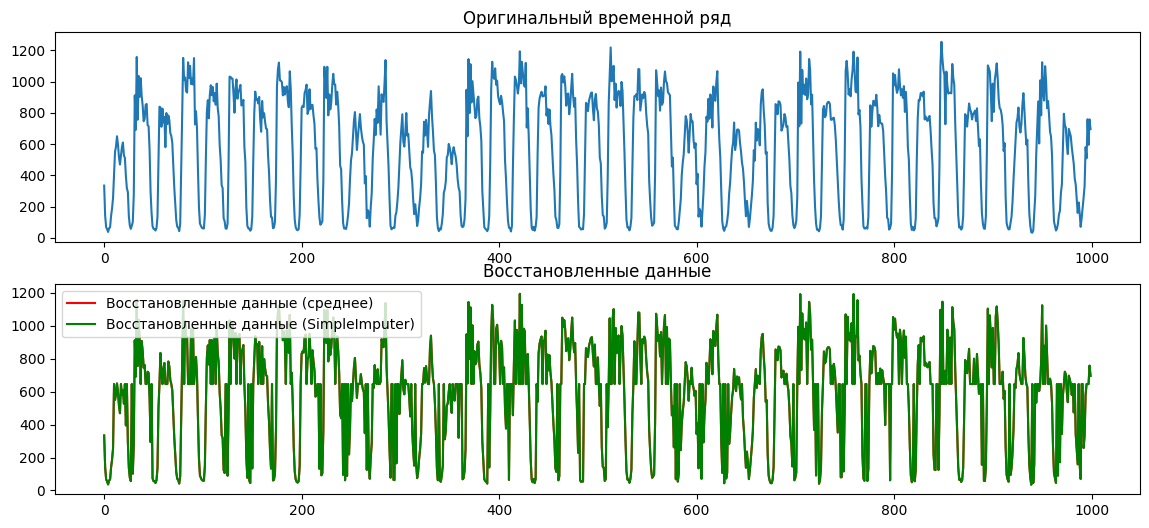

Индексы пропущенных значений: [16208 14064 19498 ... 15625  8586  9350]
Mean Squared Error для среднего: 0.0000
Mean Squared Error для SimpleImputer: 0.0000


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Функция для добавления пропусков в данные
def add_nan(x, percent=0.25):
    """
    Функция для добавления пропущенных значений (nan) в заданный временной ряд.

    :param x: Входной многомерный временной ряд (numpy array).
    :param percent: Процент пропущенных значений (от 0 до 1).
    :return: Временной ряд с пропущенными значениями и индексы пропусков.
    """
    num_elements = x.size
    num_missing = int(num_elements * percent)

    missing_indices = np.random.choice(num_elements, num_missing, replace=False)

    x_with_nan = x.copy()
    x_with_nan[missing_indices] = np.nan

    return x_with_nan, missing_indices

# Загрузка данных
madrid = np.loadtxt(path_data)[:, 0]  # Чтение данных

# Добавление пропусков в данные
madrid_with_nan, missing_indices = add_nan(madrid, percent=0.25)

# Восстановление данных с помощью среднего значения
madrid_mean = madrid_with_nan.copy()
madrid_mean[missing_indices] = np.nanmean(madrid_mean)

# Восстановление с использованием SimpleImputer (аналог IterativeSVD, но проще для одномерных данных)
imputer = SimpleImputer(strategy='mean')
madrid_imputed = imputer.fit_transform(madrid_with_nan.reshape(-1, 1)).flatten()

# Оценка качества восстановления с помощью Mean Squared Error
mse_mean = mean_squared_error(madrid[~np.isnan(madrid_with_nan)], madrid_mean[~np.isnan(madrid_with_nan)])
mse_imputed = mean_squared_error(madrid[~np.isnan(madrid_with_nan)], madrid_imputed[~np.isnan(madrid_with_nan)])

# Сохранение результатов восстановления
recovery = {
    'mean': madrid_mean,
    'imputed': madrid_imputed
}

# Визуализация оригинального и восстановленного временного ряда
fig, ax = plt.subplots(figsize=(14, 6), ncols=1, nrows=2)
ax[0].plot(madrid[:1000], label='Оригинальные данные')
ax[0].set_title('Оригинальный временной ряд')
ax[1].plot(madrid_mean[:1000], label='Восстановленные данные (среднее)', color='r')
ax[1].plot(madrid_imputed[:1000], label='Восстановленные данные (SimpleImputer)', color='g')
ax[1].set_title('Восстановленные данные')
ax[1].legend()
plt.show()

# Выводим индексы пропусков и ошибку
print("Индексы пропущенных значений:", missing_indices)
print(f"Mean Squared Error для среднего: {mse_mean:.4f}")
print(f"Mean Squared Error для SimpleImputer: {mse_imputed:.4f}")


*Вывод*:

#### **7.2 Нейросетевые методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с некоторыми нейросетевыми методами восстановления временных рядов.
Для выполнения данного пункта вам предстоит самостоятельно реализовать структуру нейросетевой, модели основанной на GRU нейронах и сравнить ее с другими нейросетевыми методами восстановления При сравнении с 3 группой из **табл.7. 2** вам необходимо выбрать **один** метод восстановления. Основные блоки обработки данных будут реализованы с использованием Pytorch. Вам не запрещается использовать для реализации Keras.

**табл. 7.2** - Нейросетевые методы восстановления.
№|Название группы|Модели и методы|
--|-------------|----|
1|Линейные нейроны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)|
 2eкрркуретные нейронны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.GRU.html)|
3|Сложные структуры|[SAITS, BRITS, M-RNN](https://github.com/WenjieDu/PyPOTS)|

In [16]:
recovery_nn = {}

In [ ]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
import time
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Функция добавления пропусков в данные
def add_nan(x, percent=0.25):
    """
    Функция для добавления пропущенных значений (nan) в заданный временной ряд.
    :param x: Входной многомерный временной ряд (numpy array или tensor).
    :param percent: Процент пропущенных значений (от 0 до 1).
    :return: Временной ряд с пропущенными значениями и индексы пропусков.
    """
    if isinstance(x, torch.Tensor):  # Если входной объект - тензор
        num_elements = x.numel()  # Получаем общее количество элементов для тензора
    elif isinstance(x, np.ndarray):  # Если входной объект - массив NumPy
        num_elements = x.size  # Используем size для массива NumPy
    else:
        raise TypeError("x должен быть либо tensor PyTorch, либо numpy array.")

    num_missing = int(num_elements * percent)
    missing_indices = np.random.choice(num_elements, num_missing, replace=False)

    x_with_nan = x.clone() if isinstance(x, torch.Tensor) else x.copy()  # Клонируем тензор или массив
    x_with_nan.ravel()[missing_indices] = float('nan')  # Присваиваем NaN случайным элементам

    return x_with_nan, missing_indices


# Пример функции для создания скользящего окна
def rolling_window(data, window_size, is_train=True):
    """
    Функция для создания скользящих окон.
    :param data: Входные данные.
    :param window_size: Размер окна.
    :param is_train: Признак, указывающий, это для обучения или тестирования.
    :return: Данные в виде скользящих окон.
    """
    return np.array([data[i:i+window_size] for i in range(len(data) - window_size)])

# Загрузка данных
madrid = np.loadtxt(path_data)[:, 0].reshape(-1, 1)

# Добавление пропусков в данные
madrid_with_nan, index = add_nan(madrid, 0.25)

# Масштабирование данных
scaler = MinMaxScaler()
madrid_normal_with_nan = scaler.fit_transform(madrid_with_nan)

# Создание скользящих окон
rolling_madrid = rolling_window(madrid_normal_with_nan, 100, True)

# Разделение на тренировочные и тестовые данные
train, test = train_test_split(rolling_madrid, shuffle=False, test_size=0.33)

# Определение модели на основе линейных нейронов
class LinearModel(nn.Module):
    def __init__(self, size_subsequent: int, dim=1, nums_layers=3, size_layers=250):
        super().__init__()
        self.size_subsequent = size_subsequent
        self.nums_layers = nums_layers * dim
        self.dim = dim
        self.size_layers = size_layers

        self.start_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(size_subsequent * dim, self.size_layers),
            nn.LeakyReLU()
        )

        self.model = nn.ModuleList([
            nn.Sequential(
                nn.Linear(self.size_layers, self.size_layers),
                nn.LeakyReLU()
            ) for _ in range(nums_layers)
        ])
        self.model = nn.Sequential(*self.model)

        self.output = nn.Sequential(nn.Linear(self.size_layers, size_subsequent * dim), nn.Tanh())

    def forward(self, x):
        x = self.start_layers(x)
        x = self.model(x)
        x = self.output(x)
        return x.reshape(x.shape[0], self.size_subsequent, self.dim)

# Параметры обучения
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = LinearModel(size_subsequent=train.shape[1], dim=train.shape[2]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)
loss_func = nn.MSELoss()
batch_size = 32
epochs = 100

train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(test, batch_size=batch_size, shuffle=True)

# Обучение модели
times_model = {}
train_history = []
valid_history = []

start = time.time()

for epoch in range(epochs):
    train_loss = 0
    valid_loss = 0

    # Тренировочный цикл
    for i, x in enumerate(train_loader):
        if x.shape[0] == batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan(X, 0.25)
            X[torch.isnan(X)] = 0.0  # Инициализация значений NaN нулями
            recovery = model(X)
            loss = loss_func(recovery[(nan) & (~test_index)], x[(nan) & (~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()

    train_loss /= (i + 1)

    # Валидация
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0] == batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan(X, 0.25)
                X[torch.isnan(X)] = 0.0
                recovery = model(X)
                loss = loss_func(recovery[(nan) & (~test_index)], x[(nan) & (~test_index)])
                valid_loss += loss.detach().cpu().item()

    valid_loss /= (i + 1)

    train_history.append(train_loss)
    valid_history.append(valid_loss)

    print(f'Epoch {epoch+1}: Train Loss = {train_loss}, Valid Loss = {valid_loss}')

end = time.time()
times_model['linear'] = end - start

# Визуализация истории обучения
plt.plot(train_history, label='Train Loss')
plt.plot(valid_history, label='Valid Loss')
plt.legend()
plt.show()

# Применение модели на тестовых данных
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)

with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        batch[nan] = 0.0
        rec = model(batch[None, :])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan] = rec[nan]

test_madrid_normal = np.vstack(test_rolling_madrid)
test_linear = scaler.inverse_transform(test_madrid_normal)

# Оценка восстановления
recovery_nn['linear'] = test_linear

# Визуализация восстановления
plt.plot(madrid[:1000, 0], label='Original')
plt.plot(test_linear[:1000, 0], alpha=0.6, label='Recovered (Linear)')
plt.legend()
plt.show()

# Оценка качества восстановления
print("MSE:", mean_squared_error(madrid[index].reshape(1, -1), test_linear[index].reshape(1, -1)))


##### 7.2.1 Загрузка и подготовка данных

##### 7.2.2 Базовая модель восстановления данных, построенная на нескольких слоях линейных нейронов.


Вам необходимо будет самостоятельно реализовать:
1. инициализацию nan значений какими либо другими значениями.
2. замер времени полного обучения и тестирования модели.

##### 7.2.3 Реккурентная модель востановлениях данных


In [ ]:
class EncoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=dim,
                          hidden_size=self.hidden_size)

        self.latten = nn.Linear(hidden_size*size_subsequent,latten_size)
        self.leaky = nn.LeakyReLU()
        self.fl = nn.Flatten()
    def forward(self, x):
        x, _ = self.gru(x)
        x = self.leaky(x)
        #print(x.shape)
        x = self.fl(x)
        x = self.latten(x)
        return self.leaky(x)


In [ ]:
class DecoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.latten_size=latten_size
        self.gru = nn.GRU(input_size=self.hidden_size,
                          hidden_size=dim)
        self.latten = nn.Linear(latten_size,hidden_size*size_subsequent)
        self.leaky = nn.LeakyReLU()

    def forward(self, x):
        x = self.latten(x)
        x = x.view(-1, self.size_subsequent, self.latten_size)
        x = self.leaky(x)
        x, _ = self.gru(x)
        return self.leaky(x)


In [ ]:
class TimeAE(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.encoder = EncoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size)
        self.decoder = DecoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size)
    def forward(self, x):
        x=self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
model = TimeAE(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)


epochs = 100

In [ ]:
model

In [ ]:
model=model.to(device)
train_history = []
valid_history = []
start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0]==batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan(X,percent)
            #

            recovery = model(X)
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0]==batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan(X,percent)
                #

                recovery = model(X)
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

In [ ]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [ ]:
times_model['ae']=end-start

In [ ]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        #

        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [ ]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_ae = scaler.inverse_transform(test_madrid_normal)

In [ ]:
recovery_nn['test_ae'] = test_ae

In [ ]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_ae[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_ae[index].reshape(1,-1)))

##### 7.2.4 Сложные модели нейросетевого восстановления данных


Вам необходимо выбрать одну модель из 3 группы таблицы 7.2 и используя документацию произвести восстановления того же ряда. Произведите замер времени.

In [ ]:
!pip install pypots==0.0.9

In [ ]:
from pypots.imputation import SAITS


In [ ]:
model= SAITS(n_features=madrid.shape[1],
             n_steps=100,
             device=device,
             d_k=64,
             d_v=64,
             d_model=128,
             d_inner=128,
             n_head=4,
             n_layers=2,
             dropout=0.05,
             epochs=100)

In [ ]:
start = time.time()
model.fit(train,test)
end = time.time()
times_model['saits']=end-start

In [ ]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
test_rolling_madrid = model.impute(test_rolling_madrid)


In [ ]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_saits = scaler.inverse_transform(test_madrid_normal)

In [ ]:
recovery_nn['saits'] = test_saits

In [ ]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_saits[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_saits[index].reshape(1,-1)))

##### 7.2.5 Сравнения результатов.
Также, как и в пункте 7.1.5 постройте графики сравнения моделей. Дополнительно постройте графики сравнения времени. Сделайте выводы

#### **7.3 Прогноз временного ряда**

##### *Краткое описание*

Используя модель и [ARIMA](реализация) произвидите прогноз ряда на следующие колличество точек: 1, 5, 10.
Сравните результаты. Постройте графики прогноза и точности прогноза.